# 1. Importing Data and Data overview

In [3]:
import pandas as pd #Library for data processing
import numpy as np #Library for mathematical operations
from matplotlib import pyplot as plt #Library for data visualization
import seaborn as sns
%matplotlib inline 

#'%'means modulo i.e. a modulo b

%config InlineBackend.figure_format = 'retina'
import warnings #import warnings library
warnings.filterwarnings('ignore') #ignore warning
import os

os.getcwd()
print(os.listdir("../Titanic.Kaggle")) #print out what is included in the directory

['test.csv', 'README.md', 'train.csv', '.ipynb_checkpoints', '.git', 'Titanic.ipynb']


In [4]:
train = pd.read_csv("~/git-practice/Titanic.Kaggle/train.csv") #load the dataset
test = pd.read_csv("~/git-practice/Titanic.Kaggle/test.csv")

In [5]:
print("The shape of this dataset is (row, column):"+ str(train.shape)) #print dimension of the dataset
print("**"*30)
print(train.info()) #prints information of the data
print("**"*30)
print("The shape of the data set is (row, column):"+ str(test.shape))
print("**"*30)
print(test.info())

The shape of this dataset is (row, column):(891, 12)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
************************************************************
The shape of the data set is (row, column):(418, 11)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    4

In [6]:
train.head() 

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

### The data is split into two groups: Training set and test set
The training set includes our dependent variable, passenger survival status along with other independent features like gender, class, fare and Pclass

The test should be used to see how our model performs on unseen data. When you say unseen data, we mean that the algorithmn or ML models have no relation to test data. We do not want to use any part of the test data in any way to modify our algorithms ; Which are the reasons why we clean our test data and train data separately (The test set does not provide passenger's survival status). We are going to use our model to predict passenger survival status.

### Categorical:
Nominal: Cabin, Embarked (Embarked location: C(Cherbourg),Q(Queenstown), S(Southhampton))

Dichotomous: Gender

Ordinal: Pclass(1(Upper), 2(Middle), 3(Lower))

### Numerical:
Discrete: PassengerID, SibSp, Parch, Survived(0 or 1)

Continuous: Age, Fare

### Text Variable: 
Ticket, Name

# 2. Cleaning up data

In [8]:
PassengerId = test.PassengerId #Keeping Passenger ID for later

In [9]:
#train.drop(['PassengerId'], axis=1, inplace=True) #Get rid of the 'PassengerId' column since it is useless
#test.drop(['PassengerId'], axis=1, inplace=True) 

print(train.info())
print("*"*60) #Print "*" 60 stars
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ti

<font color=red>*Note that the features have unequal amount of data entries for every column and they have different types of variables.</font>

### 2.1 Dealing with missing values

In [10]:
train.isnull() #Find entries with null/missing values
train.isnull().sum() #count all the missing values
train.isnull().sum().sort_values(ascending=False) #Sort the values in descending order

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

<font color=red>It seems that 'cabin', 'age' and 'embarked' have missing values in decreasing order!</font>

In [11]:
total = train.isnull().sum().sort_values(ascending=False)
percent = round(total/len(train)*100, 3) #Round the percent to 3 decimal places
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #concatenate two columns into one 

Total  Percent
Cabin          687   77.104
Age            177   19.865
Embarked         2    0.224
Fare             0    0.000
Ticket           0    0.000
Parch            0    0.000
SibSp            0    0.000
Sex              0    0.000
Name             0    0.000
Pclass           0    0.000
Survived         0    0.000
PassengerId      0    0.000

In [12]:
total = test.isnull().sum().sort_values(ascending=False)
percent = round(total/len(test)*100, 2)
pd.concat([total, percent], axis=1, keys=['Total Number of values', 'Percentages']) #Do the same for the test dataset

Total Number of values  Percentages
Cabin                           327        78.23
Age                              86        20.57
Fare                              1         0.24
Embarked                          0         0.00
Ticket                            0         0.00
Parch                             0         0.00
SibSp                             0         0.00
Sex                               0         0.00
Name                              0         0.00
Pclass                            0         0.00
PassengerId                       0         0.00

### 2.1.1 'Embaarked Feature'
We see that both datasets have missing values!

In [13]:
#Percent of values (S,C,Q) in Embarked feature
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100, 2)) #'normalize' turns into proportions
total = pd.DataFrame(train.Embarked.value_counts(dropna=False)) #number of S,C,Q values in the feature

total.columns = ['Total Number of values'] #name the function as 'Total'
percent.columns = ['Percentages']
pd.concat([total, percent], axis=1) #concatenate the two columns

Total Number of values  Percentages
S                       644        72.28
C                       168        18.86
Q                        77         8.64
NaN                       2         0.22

**'S'** is the most occuring variable in the Embarked feature followed by **'C'** and **'Q'**.

Also note that there are are a total of 2 NA values in Embarked feature, which is about *0.22%* of the whole.

We will now proceed further and see what the two NA values are.

In [14]:
train[train.Embarked.isnull()] #Printout the NA values

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

We can see that the rows that contain NA values have both paid $80 Fare, are female, Pclass of 1 and have the same ticket number!

We will create box plots to compare the relationship between the Embarked feature and the Fare feature

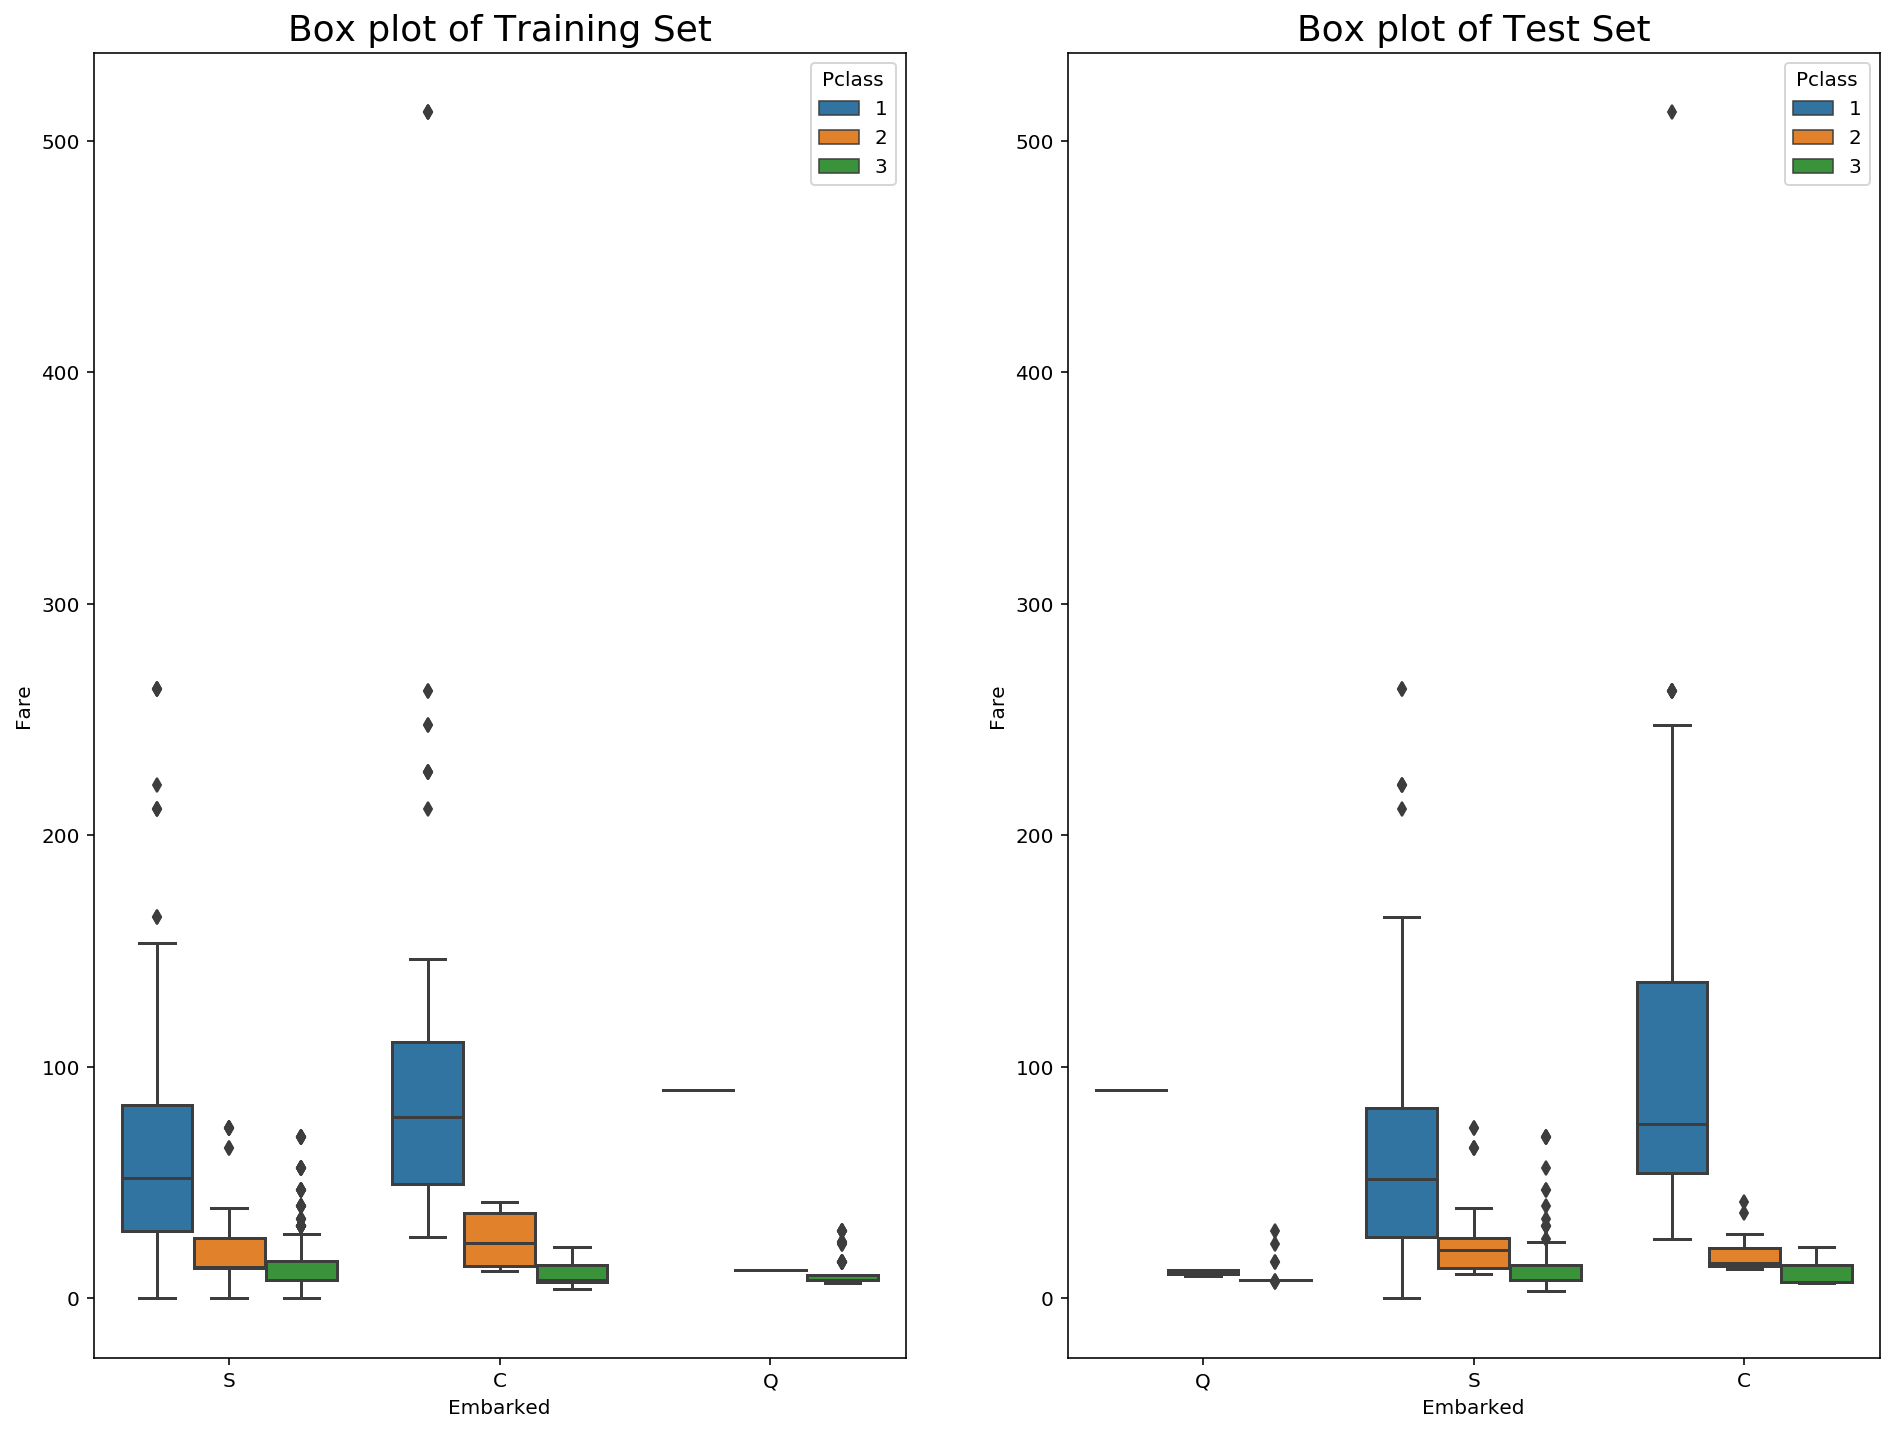

In [15]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train, ax=ax[0]); #Use boxplot (seaborn)
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test, ax=ax[1]);
ax1.set_title("Box plot of Training Set", fontsize=18) #Set title
ax2.set_title("Box plot of Test Set", fontsize=18)
fig.show()

<font color=red>It can be seen from both plots that value 'C' has it's average near $80! So we will proceed and fill-in the missing values with 'C's.</font>

In [16]:
train.Embarked.fillna('C', inplace=True) #Function to replace the null values of the feature ('Embarked') with the mode

### 2.1.2 'Cabin' Feature

In [17]:
print('Train Cabin Missing %: ' + str(train.Cabin.isnull().sum()/len(train.Cabin))) #printout the percentage of missing data in the 'Cabin' Feature
print('Test Cabin Missing %: ' + str(test.Cabin.isnull().sum()/len(test.Cabin))) #Notice we added all the missing values divided by the number of rows in the 'Cabin' Feature

Train Cabin Missing %: 0.7710437710437711
Test Cabin Missing %: 0.7822966507177034


<font color=red>We see that both the Train and Test dataset have +70% missing values!</font>

So what should we do with this feature? Should we get rid of them? How is 'Cabin' feature important in determining what sort of people were likely to live?

One argument could be that the existence of Cabin records would mean passengers who stayed in those cabins might have had higher social status than those who didn't, i.e. they were able to pay more money to be in a better cabin! It could also be that those who had cabin records might have had better chances of being loaded on the survival boats!

In [18]:
survivers = train.Survived #assign a new variable to the 'Survived' Feature under the train dataset

train.drop(['Survived'], axis=1, inplace=True) #get rid of the 'Survived' Feature in the train dataset

all_data = pd.concat([train, test], ignore_index=True) #Concatenate the 'train' and 'test' dataset and also ignore the indecies

all_data.Cabin.fillna("N", inplace=True) #replace the NA values with 'N'

#Notice the steps above in combining two datasets where the 'Survived' Feature was removed from the train dataset
#First we isolated the 'Survived' feature from the train data set
#Second we dropped the 'Survived' feature from the train data set
#Third we concatenated the train and test dataset
#Lastly we filled the missing values with 'N'

In [19]:
all_data.sample(10)

PassengerId  Pclass                                              Name  \
384           385       3                            Plotcharsky, Mr. Vasil   
965           966       1                              Geiger, Miss. Amalie   
180           181       3                      Sage, Miss. Constance Gladys   
92             93       1                       Chaffee, Mr. Herbert Fuller   
223           224       3                              Nenkoff, Mr. Christo   
1069         1070       2  Becker, Mrs. Allen Oliver (Nellie E Baumgardner)   
4               5       3                          Allen, Mr. William Henry   
1060         1061       3                      Hellstrom, Miss. Hilda Maria   
589           590       3                               Murdlin, Mr. Joseph   
910           911       3             Assaf Khalil, Mrs. Mariana (Miriam")"   

         Sex   Age  SibSp  Parch       Ticket      Fare Cabin Embarked  
384     male   NaN      0      0       349227    7.8958     N        S  
965   female  35.0      0      0       113503  211.5000  C130        C  
180   female   NaN      8      2     CA. 2343   69.5500     N        S  
92      male  46.0      1      0  W.E.P. 5734   61.1750   E31        S  
223     male   NaN      0      0       349234    7.8958     N        S  
1069  female  36.0      0      3       230136   39.0000    F4        S  
4       male  35.0      0      0       373450    8.0500     N        S  
1060  female  22.0      0      0         7548    8.9625     N        S  
589     male   NaN      0      0   A./5. 3235    8.0500     N        S  
910   female  45.0      0      0         2696    7.2250     N        C

It can be seen from above that some passengers booked two different Cabins under his name. This is probably because they traveled with their families. Notice also that the Cabin numbers are very close or have same letters.

We think that the letters in the Cabin number is more important, so we will proceed and group the Cabin numbers with the letters.

In [20]:
all_data.Cabin=[i[0] for i in all_data.Cabin] #Create a for-loop to determine the first letter of the each rows of the 'Cabin' feature

with_N = all_data[all_data.Cabin == 'N'] #variable for determining the first letter to be 'N'
without_N = all_data[all_data.Cabin != 'N'] #variable for determining the first letter other than 'N'

all_data.groupby('Cabin')['Fare'].mean().sort_values(ascending=True) #Group each letters by the mean

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [21]:
def cabin_estimator(i): #Define a function to assign Cabin names according to the mean values
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>=47 and i<53:
        a = "E"
    elif i>=53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = "C"
    else:
        a = "B"
    return a

<font color=red>Now we apply the 'cabin_estimator' function to the unknown Cabins!</font>

In [22]:
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x)) #.apply(lambda x: function(x)) to apply the function

In [23]:
all_data = pd.concat([with_N,without_N], axis=0) #We put back the modified column
all_data.sort_values(by = 'PassengerId', inplace=True) #Since 'PassengerId' attributes individual numbers to each of the rows, we use it to sort out the rows to separate train and test datasets

train = all_data[:891] #Now we separate the two datasets!
test = all_data[891:] 

train['Survived'] = survivers #Now we add back the saved variable to the train dataset
train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500     G        S   
1  female  38.0      1      0          PC 17599  71.2833     C        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250     G        S   
3  female  35.0      1      0            113803  53.1000     C        S   
4    male  35.0      0      0            373450   8.0500     G        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [24]:
test.head()

PassengerId  Pclass                                          Name  \
891          892       3                              Kelly, Mr. James   
892          893       3              Wilkes, Mrs. James (Ellen Needs)   
893          894       2                     Myles, Mr. Thomas Francis   
894          895       3                              Wirz, Mr. Albert   
895          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

        Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
891    male  34.5      0      0   330911   7.8292     G        Q  
892  female  47.0      1      0   363272   7.0000     G        S  
893    male  62.0      0      0   240276   9.6875     G        Q  
894    male  27.0      0      0   315154   8.6625     G        S  
895  female  22.0      1      1  3101298  12.2875     G        S

<font color=red>Notice the 'Cabin' Features have no room numbers after the letters!</font>

### 2.1.3 'Fare Feature'

In [25]:
test[test.Fare.isnull()] #Check the null values for the 'Fare Feature'

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch  \
1043         1044       3  Storey, Mr. Thomas  male  60.5      0      0   

     Ticket  Fare Cabin Embarked  
1043   3701   NaN     B        S

<font color=red>We only have one row!</font>

Instead of taking the average of the 'Fare' column with all the values to fill for NA, we take the average of the values where 'PClass' is 3, 'Sex' is male and 'Embarked' is S.

In [26]:
missing_value = test[(test.Pclass ==3)&(test.Sex == 'male')&(test.Embarked == 'S')].Fare.mean()

test.Fare.fillna(missing_value, inplace=True) #replace the missing values with test.Fare mean

**missing_value** = So we took the rows of the 'Fare' feature that had 'Pclass'= 3 & 'Sex' = male & 'Embarked' = S (3 conditions) and took the mean = *12.718872*

after that NA's were replaced with the 'missing_value'

The reason why we took three features that were identical (if categorical) or took the average (if numerical) is because we tried to find all the features that could be related to the missing value and come up with a value that is coherent!

### 2.1.3 'Age Feature'

In [27]:
print("Train missing value : " +str(train.Age.isnull().sum()/len(train)))
print("Test missing value : " +str(test.Age.isnull().sum()/len(test)))

Train missing value : 0.19865319865319866
Test missing value : 0.20574162679425836


<font color=red>Notice both datasets have about 20% of the values missing!</font>

What now? Note some of the standard approaches to dealing with missing values are: **MEAN, MODE** and **MEDIAN**. However, we take a different approach in this case since about **20%** of the data is missing. 

Note that *Age* feature is an important variable in determining one's survival. So it would not be wise to replace the null values with median, mean and mode. We will be using machine learning model *Random Forest Regressor* to *impute* missing value instead of the Null value.

We will keep the *Age* feature for now and return to it when we start the feature engineering approach.

## 3. Visualization and Feature Relations

Before we dive into identifying relations between different features and dependent variable(Survivor), let us create some predictions about how the relationship might turnout among the features.

#### Predictions:
   -  **Gender:** More females survived than male
   -  **Pclass:** Higher socio-economic status meant higher survival rate
   -  **Age:** Younger passengers had higher survival rate

### 3.1 Gender and Survival rate

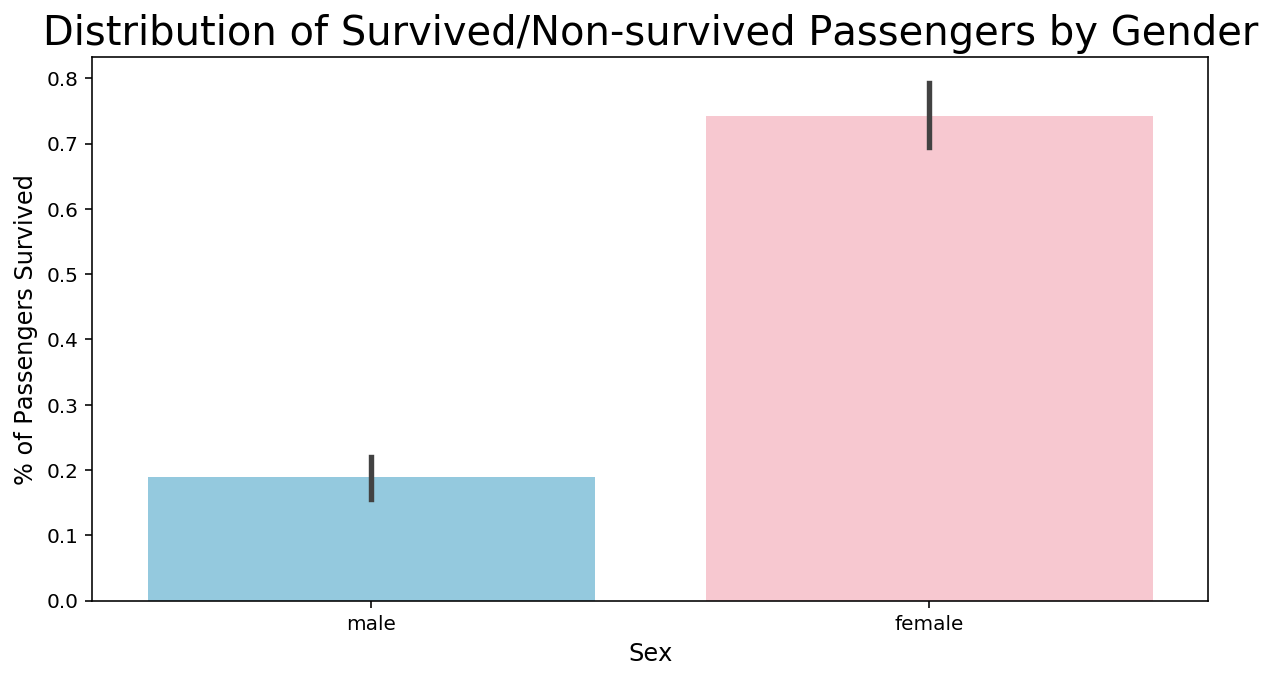

In [28]:
pal = {'male':'skyblue', 'female':'pink'} #set colors for the graphs
plt.subplots(figsize = (10,5)) #set figure size
ax = sns.barplot(x = "Sex", y = 'Survived', data=train, palette=pal, linewidth = 2) #notice we used the 'sns.barplot' function!

plt.title('Distribution of Survived/Non-survived Passengers by Gender', fontsize = 20)
plt.ylabel('% of Passengers Survived', fontsize = 12)
plt.xlabel('Sex', fontsize = 12); #note ';' at the end removes the vector

The barplot above is a distribution of % of male/female that survived.
The plot shows that about <font color=red>75%</font> of female passengers survived, while only about <font color=red>19%</font> of male passengers survived.

#### We will proceed further and compare the survival rate for both male and female:

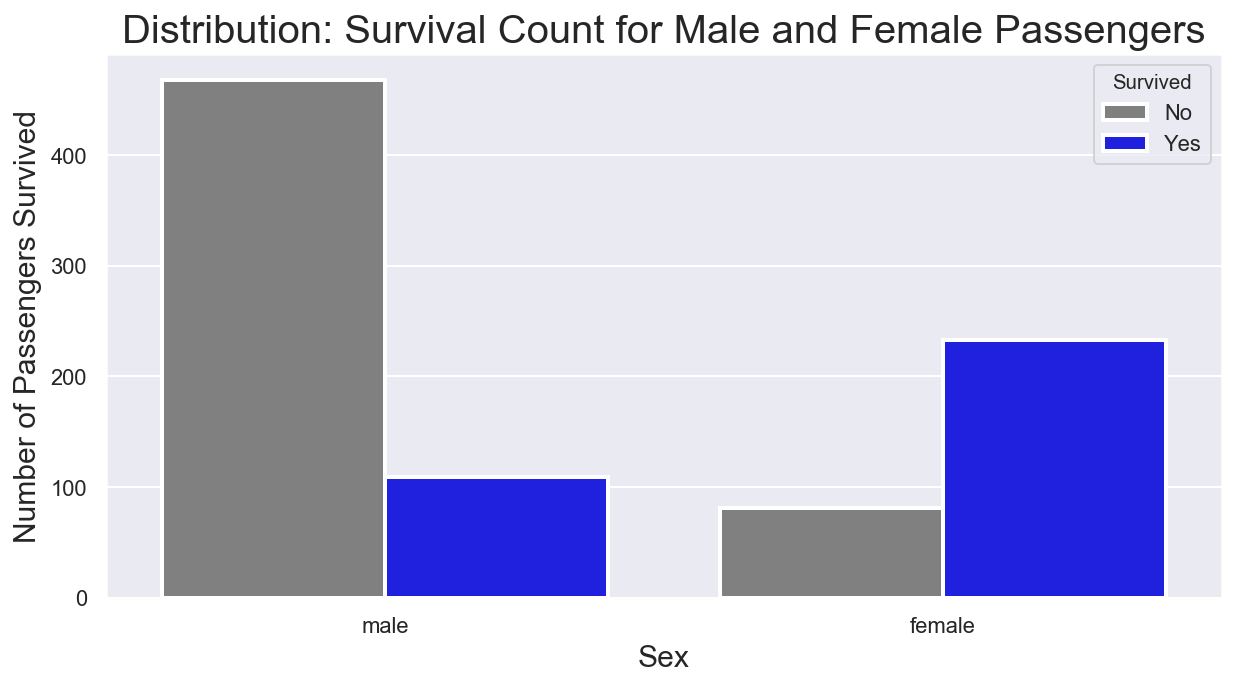

In [29]:
pal = {1:'blue', 0:'gray'} #set colors for each of the variables, '1' for blue and '0' for gray
sns.set(style='darkgrid') #set grid style
plt.subplots(figsize=(10,5))
ax = sns.countplot(x='Sex', hue='Survived', data=train, linewidth=2, palette = pal)

plt.title('Distribution: Survival Count for Male and Female Passengers', fontsize = 20);
plt.xlabel('Sex', fontsize = 15);
plt.ylabel('Number of Passengers Survived', fontsize = 15);

#Modify legend labels
leg = ax.get_legend()
leg.set_title('Survived') #set title for the legend
legs = leg.texts #set variable for the variable names for the legend
legs[0].set_text('No') #change 0 to No
legs[1].set_text('Yes') #change 1 to Yes
plt.show()

It can be seen from the distribution above that out of all the male passengers, <font color=blue>100</font> survived and <font color=red>+450</font> did not survive. On the other hand, <font color=blue>~220</font> females passengers survived while only <font color=red>~90</font> female passengers was not able to survive.

Basing on the two distributions above, we now see that female passengers had higher survival rate than male passengers. We can further infer that when it came to survival, female passengers and children were priority.

### 3.1.1 Passenger Class and Survival Rate

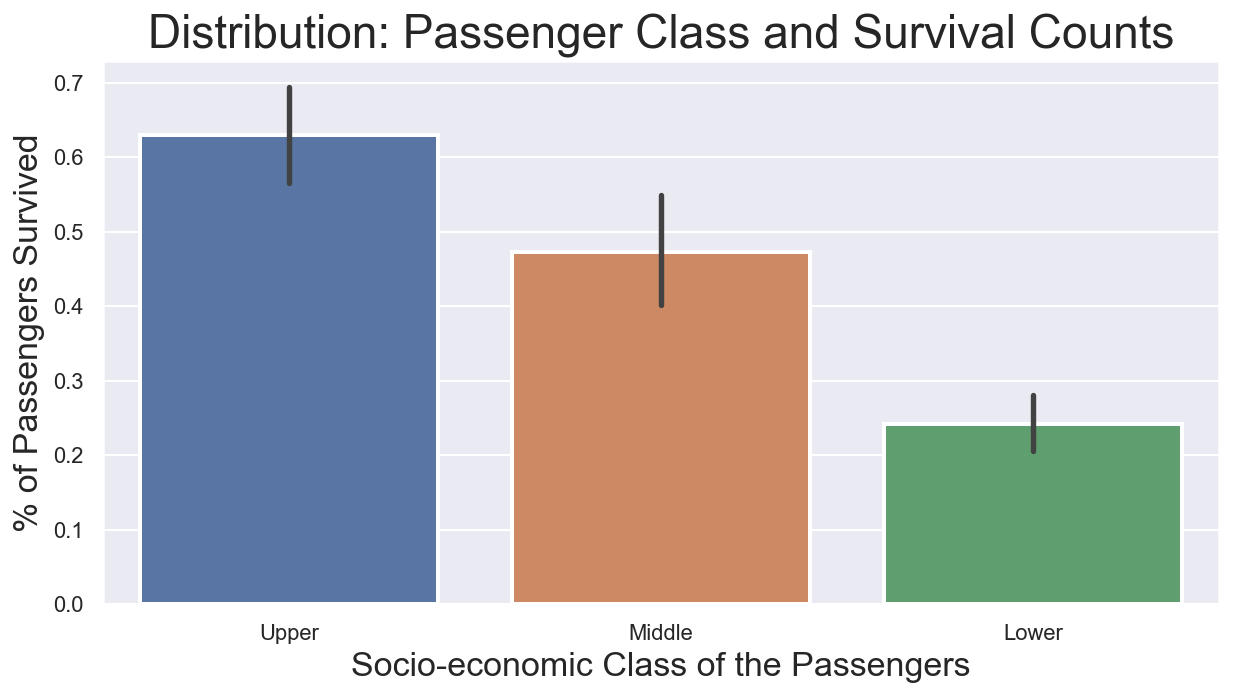

In [30]:
plt.subplots(figsize = (10,5))
sns.barplot(x='Pclass', y='Survived', data=train, linewidth=2); #function for barplot

plt.title('Distribution: Passenger Class and Survival Counts', fontsize =23)
plt.xlabel('Socio-economic Class of the Passengers', fontsize=17)
plt.ylabel('% of Passengers Survived', fontsize=17);

labels=['Upper','Middle','Lower']

val = [0,1,2]
plt.xticks(val, labels); #switch the x labels to 'lables' variable

It can be seen from the graph above that Passengers from *Upper Class* had the highest survival rate followed by *Middle Class* and *Lower Class* with the lowest survival rate.

*~63% of the Upper Class Passengers survived;*

*~48% of the Middle Class Passengers survived;*

*~24% of the Lower Class passengers survived.*



#### We will proceed further and try to plot a kernel density distribution

*Kernel Density Estimation (KDE)* is a non-parametric way to estimate the pdf of a random variable. KDE is a fundamental data smoothing problem where inferences about the **population** are made based on a finite data sample.

**Following is a mathematical definition of the KDE from Wikipedia:**

Let $(x_1,x_2,...,x_n)$ be univariate *iid* sample drawn from some distribution with unknown density *f . We are interested in *estimating* the shape of this function *f*.

$\widehat{f}_h(x)=\frac{1}{n}\sum_{i=1}^{n}K_h(x-x_i)=\frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-x_i}{h})$ , where $K$ is the Kernel (non-negative function) and $h>0$ is a smoothing parameter called the bandhwidth. 

A $K_h$ is called the *scaled kernel* and defined as $Kh(x)=\frac{1}{h}K(\frac{x}{h})$

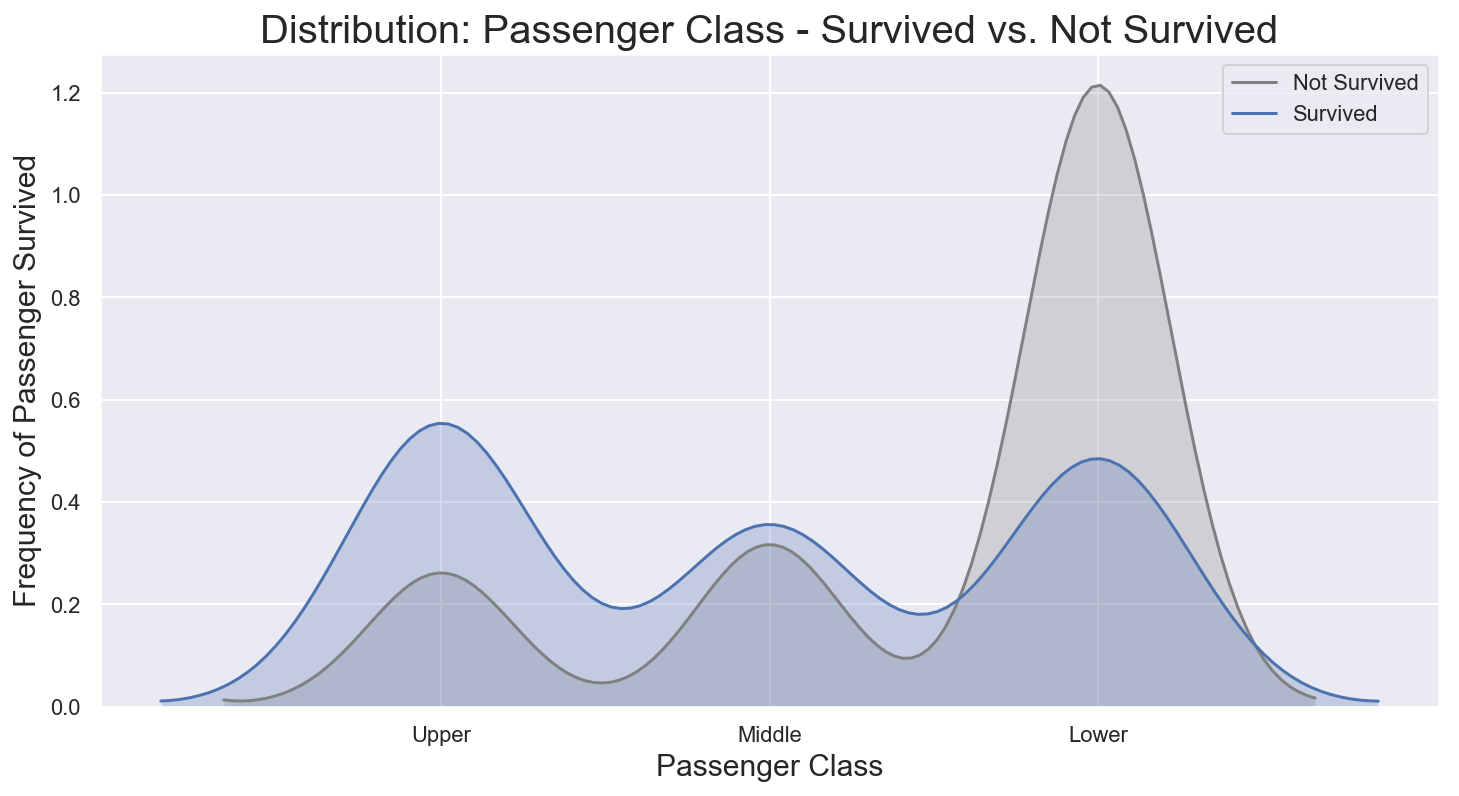

In [31]:
fig = plt.figure(figsize=(12,6),)
sns.set(style='darkgrid')

ax = sns.kdeplot(train.Pclass[train.Survived == 0], color = 'gray', shade=True, label='Not Survived') #Kernel Density function for Pclass where people did not survive
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'], color = 'b', shade=True, label='Survived') #Kernel Density for Pclass where people survived
#above is same as 'ax = sns.kdeplot(train.Pclass[train.Survived == 1], color = 'g', shade = True, label='Survived')'

plt.title('Distribution: Passenger Class - Survived vs. Not Survived', fontsize = 20);
plt.ylabel('Frequency of Passenger Survived', fontsize=15)
plt.xlabel('Passenger Class', fontsize=15);

labels = ['Upper', 'Middle', 'Lower'] 
plt.xticks(sorted(train.Pclass.unique()), labels); #change the labels in the legend

It can be observed from the KDE distribution above that there is an increasing pattern in terms of passengers that were not able to servce as class moves down from *Upper* to *Lower*. *Upper Class* passengers had *~0.28* frequency of people that did not survive, *Middle class* passengers had *~0.30* frequency of people that did not survive and *Lower class* passengers had *~1.25* frequency of people that did not survive.

Looking at the distribution for passengers that survived, *Upper class* passengers had the highest frequency for survival (*~0.58*), followed by *Middle class* passengers (*~0.35*) and *Lower class* passengers (*~0.50*).

*It could also be questionable at this point as lower class people had higher survival frequency than that of the middle class. This is because there were more lower class passengers than middle class passengers.*

#### Summary:
It can be inferred through the graphs that the Upper class had the priority when the tragedy occurred. We will proceed further and compare the survival rate with the ticket fare amount.

### 3.1.3 Ticket Fare and Survival Rate

Again, we will make use of the KDE distribution here

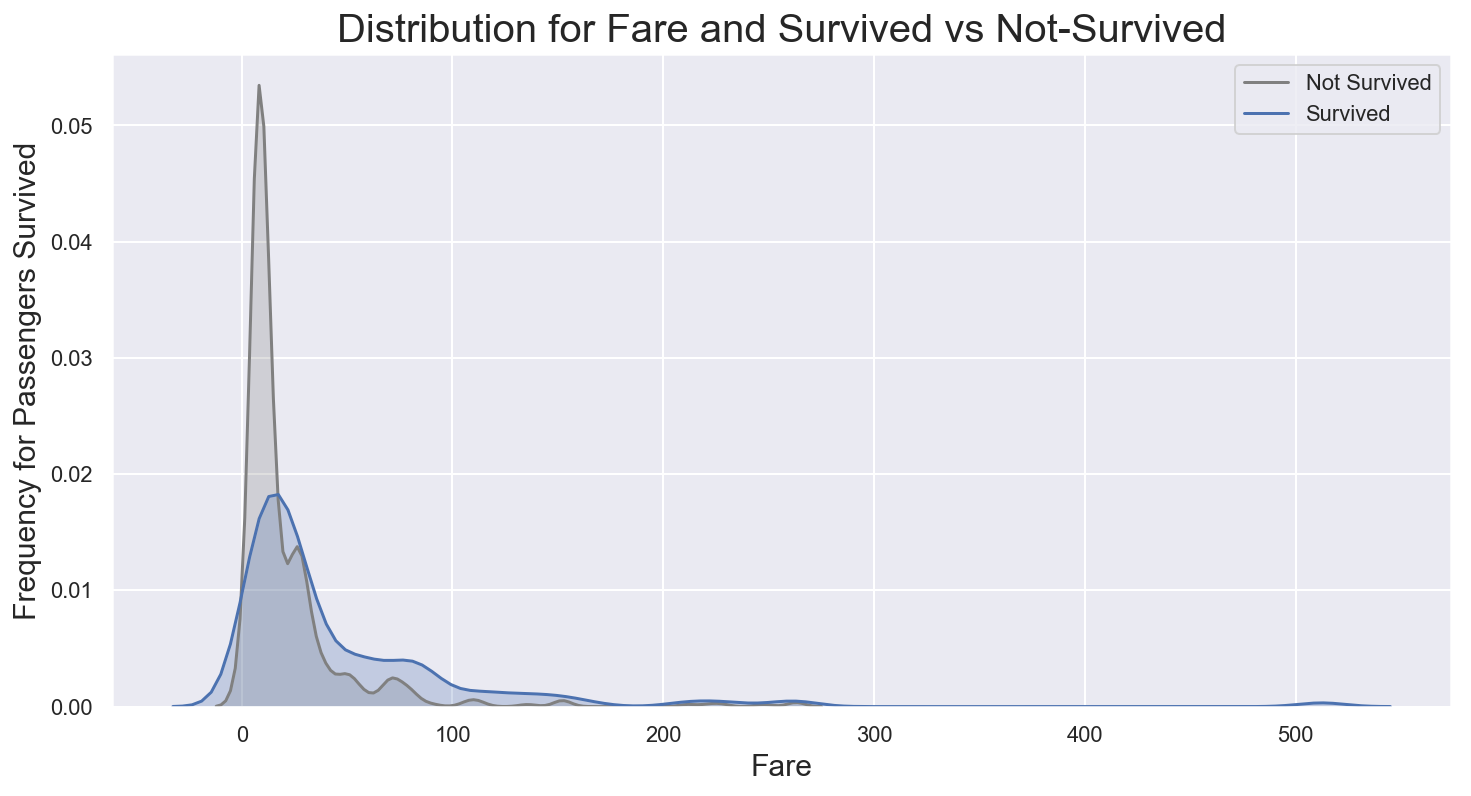

In [32]:
fig = plt.figure(figsize = (12,6),)
sns.set(style='darkgrid')

ax = sns.kdeplot(train.Fare[train.Survived == 0], color ='gray', shade=True, label='Not Survived') #plot for Fare and 'Not Survived'
#ax = sns.kdeplot(train.loc['Fare',(train['Survived'] == 0)])
ax = sns.kdeplot(train.Fare[train.Survived == 1], color ='b', shade=True, label= 'Survived') #plot for Fare and 'Survived'

plt.title('Distribution for Fare and Survived vs Not-Survived', fontsize=20);
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Frequency for Passengers Survived', fontsize=15);

*Things we can observe from the graph aobve:*
   1. The spike under the fare of *100* means that a lot of passengers who bought the ticket that cost *100* did not survive.
   2. When the fare is more than about *280*, it could mean that either everyone who paid more that *280* survived or there could be an outlier that complicates our judgement!
   
   So let's go ahead and check!


In [33]:
train[train.Fare > 280] #check for all the data that exceeds fare amount of 280 dollars

PassengerId  Pclass                                Name     Sex   Age  \
258          259       1                    Ward, Miss. Anna  female  35.0   
679          680       1  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737          738       1              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked  Survived  
258      0      0  PC 17755  512.3292     B        C         1  
679      0      1  PC 17755  512.3292     B        C         1  
737      0      0  PC 17755  512.3292     B        C         1

These three are outliers of *~$512*. We can delete this point but we will keep them for now!

### 3.1.4 Age and Survival Rate

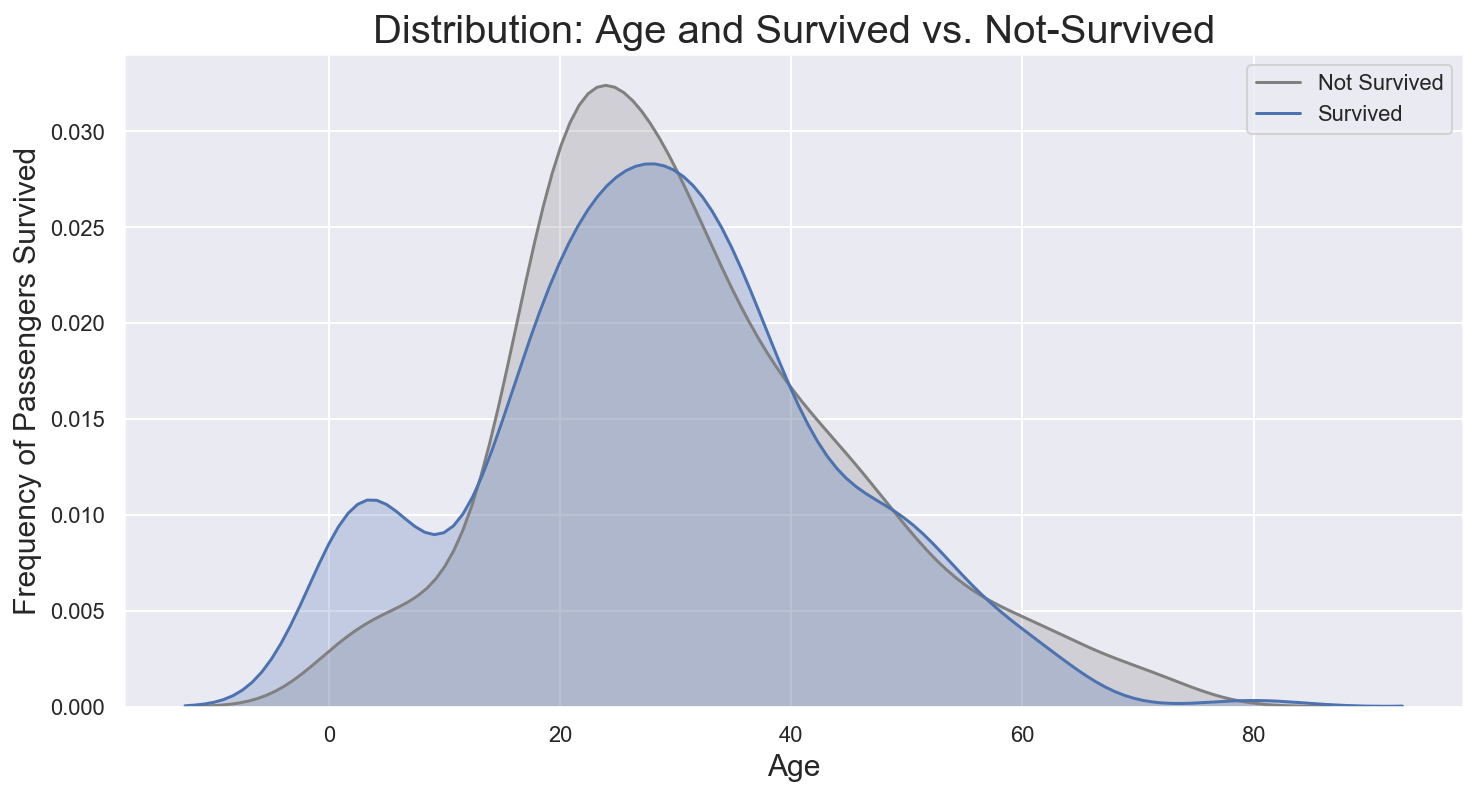

In [34]:
fig = plt.figure(figsize=(12,6),)
ax = sns.kdeplot(train.Age[train.Survived==0], color='gray', shade=True, label='Not Survived')
ax = sns.kdeplot(train.Age[train.Survived==1], color='b', shade=True, label='Survived')

plt.title('Distribution: Age and Survived vs. Not-Survived', fontsize= 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency of Passengers Survived', fontsize=15);

It can be noted from the graph above that children/infants had the priority when it came to survival. Nothing in particular seems significant other than this.

### 3.1.5 Combined Feature Relations

We will show more than two features in a single graph.

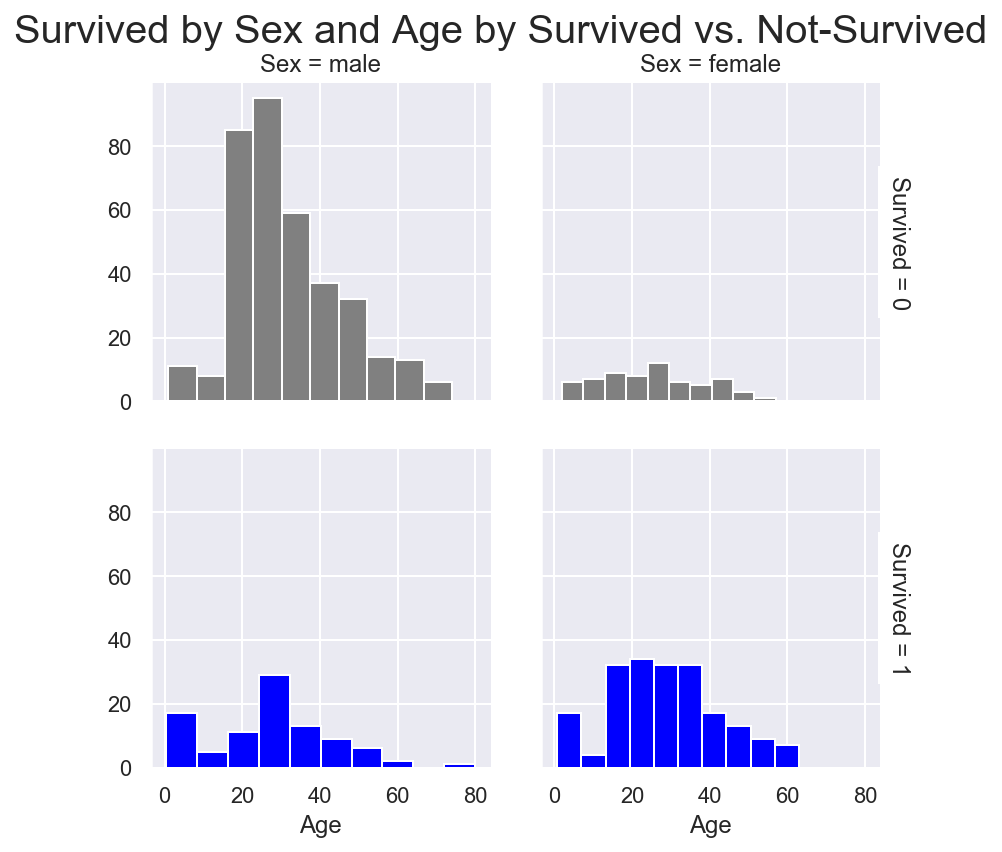

In [35]:
pal = {1:'blue',0:'gray'} #set colors for the graphs

g = sns.FacetGrid(train, size = 3, col='Sex', row='Survived', margin_titles=True, hue='Survived', palette=pal) #create a 'FacetGrid' for the train dataset where the x-axes is 'Age' and y-axes is Survived (0 or1)
g = g.map(plt.hist, 'Age', edgecolor = 'white'); #plot histograms

g.fig.suptitle('Survived by Sex and Age by Survived vs. Not-Survived', size = 20) #'supertitle' for all the subplots
plt.subplots_adjust(top=0.9);

Facetgrid is a way of visualize multiple variables and their relationships at once. From 3.1, we know female passengers had higher survival count than the male passengers (females had the priority when it came to survival!). 
Now, from the graph, we can see what age groups had higher/lower survival rates.

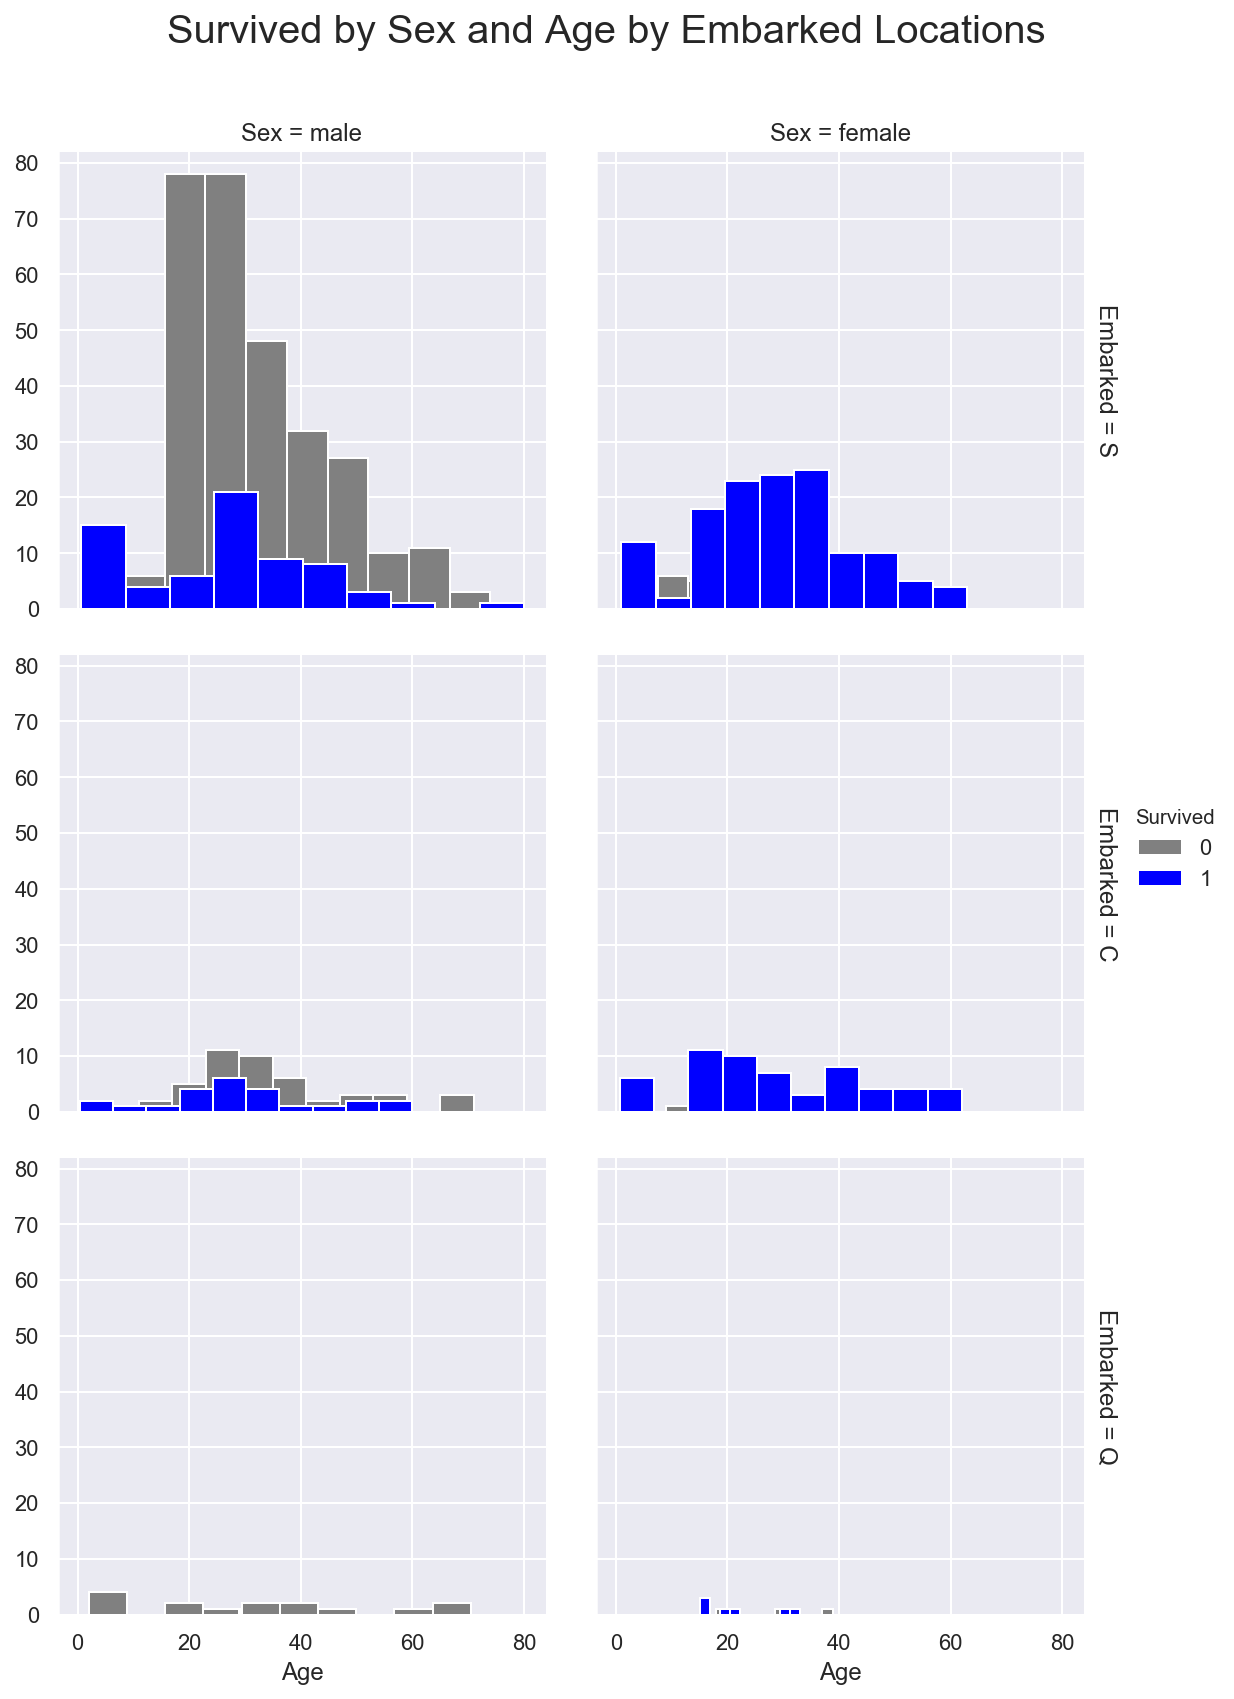

In [36]:
g = sns.FacetGrid(train, size=4, col='Sex', row='Embarked', margin_titles=True, hue='Survived', palette=pal)
g = g.map(plt.hist, 'Age', edgecolor= 'white').add_legend();

g.fig.suptitle("Survived by Sex and Age by Embarked Locations", size= 20) #Set title
plt.subplots_adjust(top=0.9) #move down the graphs to the suptitle would not appear on the graphs

The graph above shows four features at once, **'Embarked'**,**'Age'**,**'Survived'** and **'Sex'**.

The <font color=blue>blue color</font> indicates survival status.

The columns represent sex: male or female

The rows represent the embarked towns: S, C and Q

#### Summary:

1. Most Passengers are from Southampton (S).
2. More than 60% of the passengers who died are from Southampton.
3. More than 60% of the passengers that lived are from Cherbourg (C).
4. Almost everyone from Queenstown (Q) did not survive.
5. Most of the few females that were from Queenstown survived.

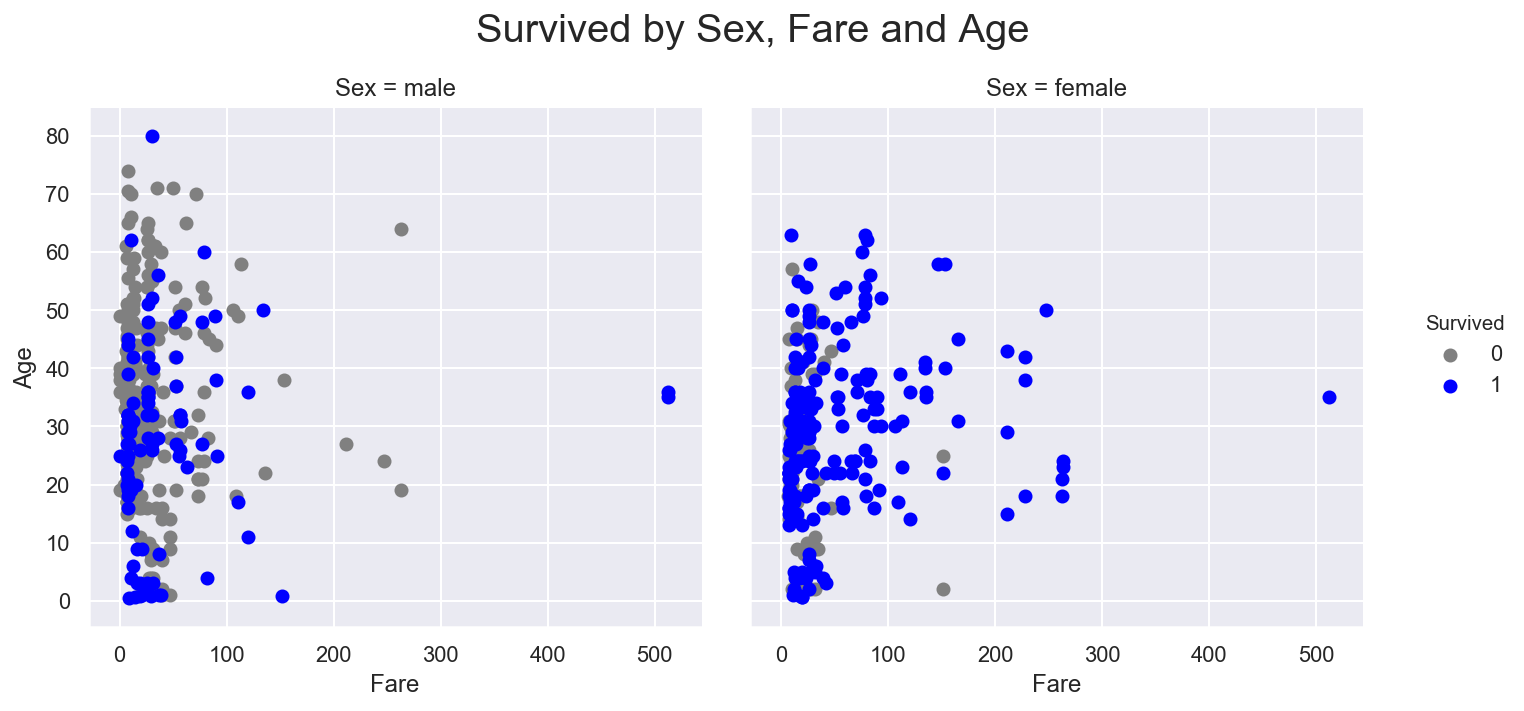

In [37]:
g = sns.FacetGrid(train, size=5, hue='Survived', col='Sex', margin_titles=True, palette=pal) #Set up the FacetGrid
g.map(plt.scatter, 'Fare', 'Age').add_legend()

g.fig.suptitle('Survived by Sex, Fare and Age', size=20)
plt.subplots_adjust(top=0.85)

First the scatter plot is graphed according to 'Fare' on the x-axis, 'Age' on the y-axis. The columns represent 'Sex' and <font color=blue>blue dots</font> represent survived passengers and the <font color=gray>gray dots</font> represent non-survived passengers.

We can see from the graph on the left that there are more <font color=gray>gray dots</font> than <font color=blue > blue dots</font>, which shows that more female passengers survived and that they had the priority.

We also see the three outliers we saw from **3.1.3** above (passengers that paid fare +$500). So we proceed and delete the outliers!

Lastly, we see that most of the passengers paid less than $100 for their fare.

In [38]:
train = train[train.Fare < 500] #Now we drop the three outliers

We will now do a factor plot. Factor plot is an informative tool when you want to compare multiple groups. The following is a factor plot with it's parameters:

    sns.factorplot(data = df, 
              x = 'input'
              y = 'input'
              hue = 'input')

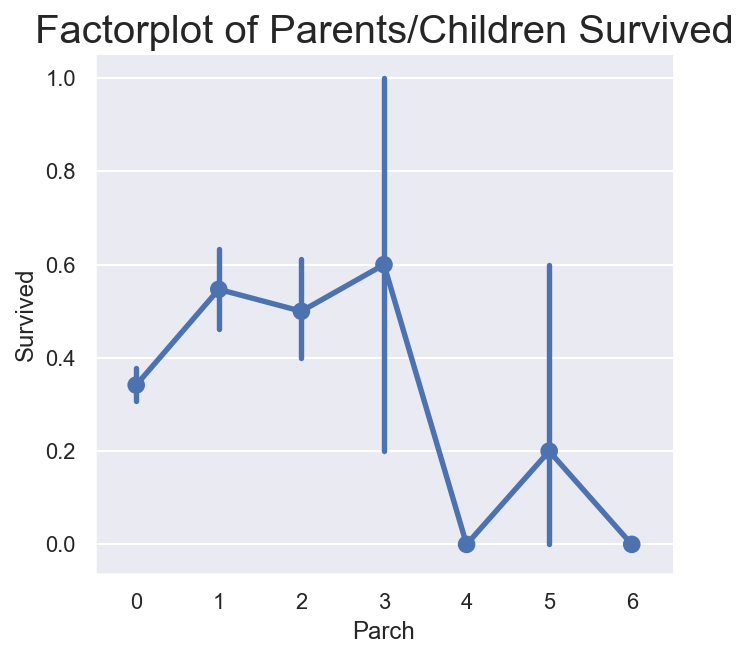

In [39]:
sns.factorplot(x='Parch',  y='Survived', data=train, size=5)
plt.title('Factorplot of Parents/Children Survived', fontsize=20);
plt.subplots_adjust(top=0.85)

We see from the graph that passengers who traveled as groups had less survival rate than those who traveled with less members of the group or alone.

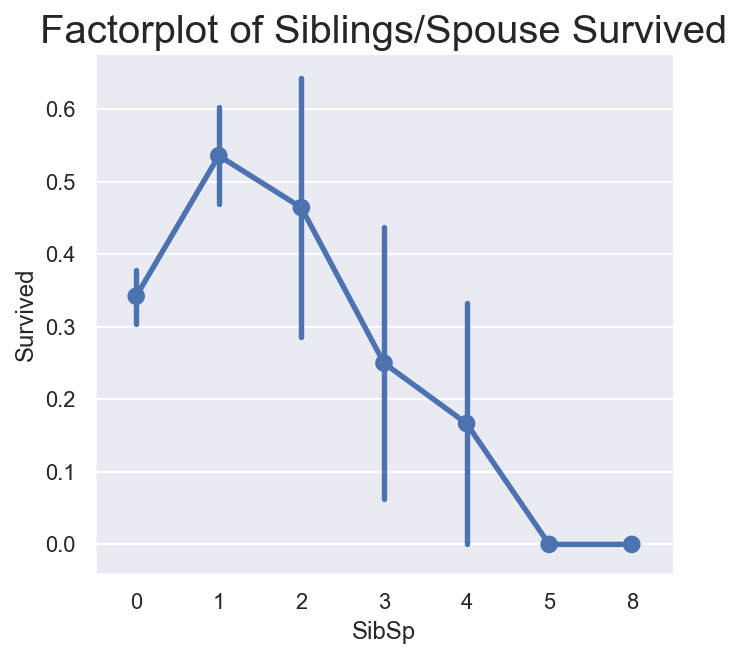

In [40]:
sns.factorplot(x='SibSp', y='Survived', data=train, size=5)
plt.title('Factorplot of Siblings/Spouse Survived', fontsize=20)
plt.subplots_adjust(top=0.85)

We also see that passengers who traveled with less siblings/spouse had higher survival rates than others.

In [41]:
train['Sex'] = train.Sex.apply(lambda x:0 if x =='female' else 1) #Now we modify/replace nominal data with binary data for convenience
test['Sex'] = test.Sex.apply(lambda x:0 if x == 'female' else 1) #notice the use of '.apply(lambda x: 'desired value' if x == 'target' else '!desired value')'

## 4. Statistical Overview

In [42]:
train.describe() #this is similar to to 'summary(input)' function in R

PassengerId      Pclass         Sex         Age       SibSp  \
count   888.000000  888.000000  888.000000  711.000000  888.000000   
mean    445.618243    2.313063    0.647523   29.675345    0.524775   
std     257.405474    0.834007    0.478011   14.552495    1.104186   
min       1.000000    1.000000    0.000000    0.420000    0.000000   
25%     222.750000    2.000000    0.000000   20.000000    0.000000   
50%     445.500000    3.000000    1.000000   28.000000    0.000000   
75%     667.250000    3.000000    1.000000   38.000000    1.000000   
max     891.000000    3.000000    1.000000   80.000000    8.000000   

            Parch        Fare    Survived  
count  888.000000  888.000000  888.000000  
mean     0.381757   30.582164    0.381757  
std      0.806949   41.176366    0.486091  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   30.771850    1.000000  
max      6.000000  263.000000    1.000000

we have above a *statistical summary* of the train dataset

In [43]:
train.describe(include=['O'])

Name    Ticket Cabin Embarked
count                  888       888   888      888
unique                 888       680     8        3
top     Harris, Mr. George  CA. 2343     G        S
freq                     1         7   464      644

In [44]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().reset_index() #mean of 'Pclass' and 'Survived' shown by classes

Pclass  Survived
0       1  0.624413
1       2  0.472826
2       3  0.242363

In [45]:
survived_summary = train.groupby('Survived') #mean of the  sorted/grouped by 'Survived' (0 or 1)
survived_summary.mean().reset_index()

Survived  PassengerId    Pclass       Sex        Age     SibSp     Parch  \
0         0   447.016393  2.531876  0.852459  30.626179  0.553734  0.329690   
1         1   443.353982  1.958702  0.315634  28.270627  0.477876  0.466077   

        Fare  
0  22.117887  
1  44.289799

In [46]:
survived_summary = train.groupby('Sex') #mean of the features sorted/grouped by 'Sex'
survived_summary.mean().reset_index()

Sex  PassengerId    Pclass        Age     SibSp     Parch       Fare  \
0    0   431.578275  2.162939  27.888462  0.696486  0.651757  42.985091   
1    1   453.260870  2.394783  30.705477  0.431304  0.234783  23.830658   

   Survived  
0  0.741214  
1  0.186087

In [47]:
survived_summary = train.groupby('Pclass') #mean of the features sorted/grouped by 'Pclass'
survived_summary.mean().reset_index()

Pclass  PassengerId       Sex        Age     SibSp     Parch       Fare  \
0       1   460.225352  0.563380  38.280984  0.422535  0.356808  78.124061   
1       2   445.956522  0.586957  29.877630  0.402174  0.380435  20.662183   
2       3   439.154786  0.706721  25.140620  0.615071  0.393075  13.675550   

   Survived  
0  0.624413  
1  0.472826  
2  0.242363

#### Summary:
   1. A total of 891 rows and 9 columns.
   2. A total of ~0.382 passengers survived.
   3. A total of ~0.741 female passengers survived while only ~0.186 male passengers survived.
   4. A total of ~0.63 Upper class passengers survived while ~0.24 Lower class passengers survived.

### 4.1.1 Correlation Matrix and Heatmap

In [48]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

Survived
Survived     1.000000
Sex          0.545899
Pclass       0.334068
Fare         0.261742
Parch        0.082157
Age          0.079472
SibSp        0.033395
PassengerId  0.006916

We have calculated the correlation for each of the features. We see that 'Sex' has the highest correlation (~0.55) followed by the 'Pclass' feature (~0.334).

In [49]:
 corr = train.corr()**2 #double asterisk '**' means exponentiation
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

Squaring the correlation values not only returns positive correlations but also amplifies the relationships.

Now we graph the heatmap!

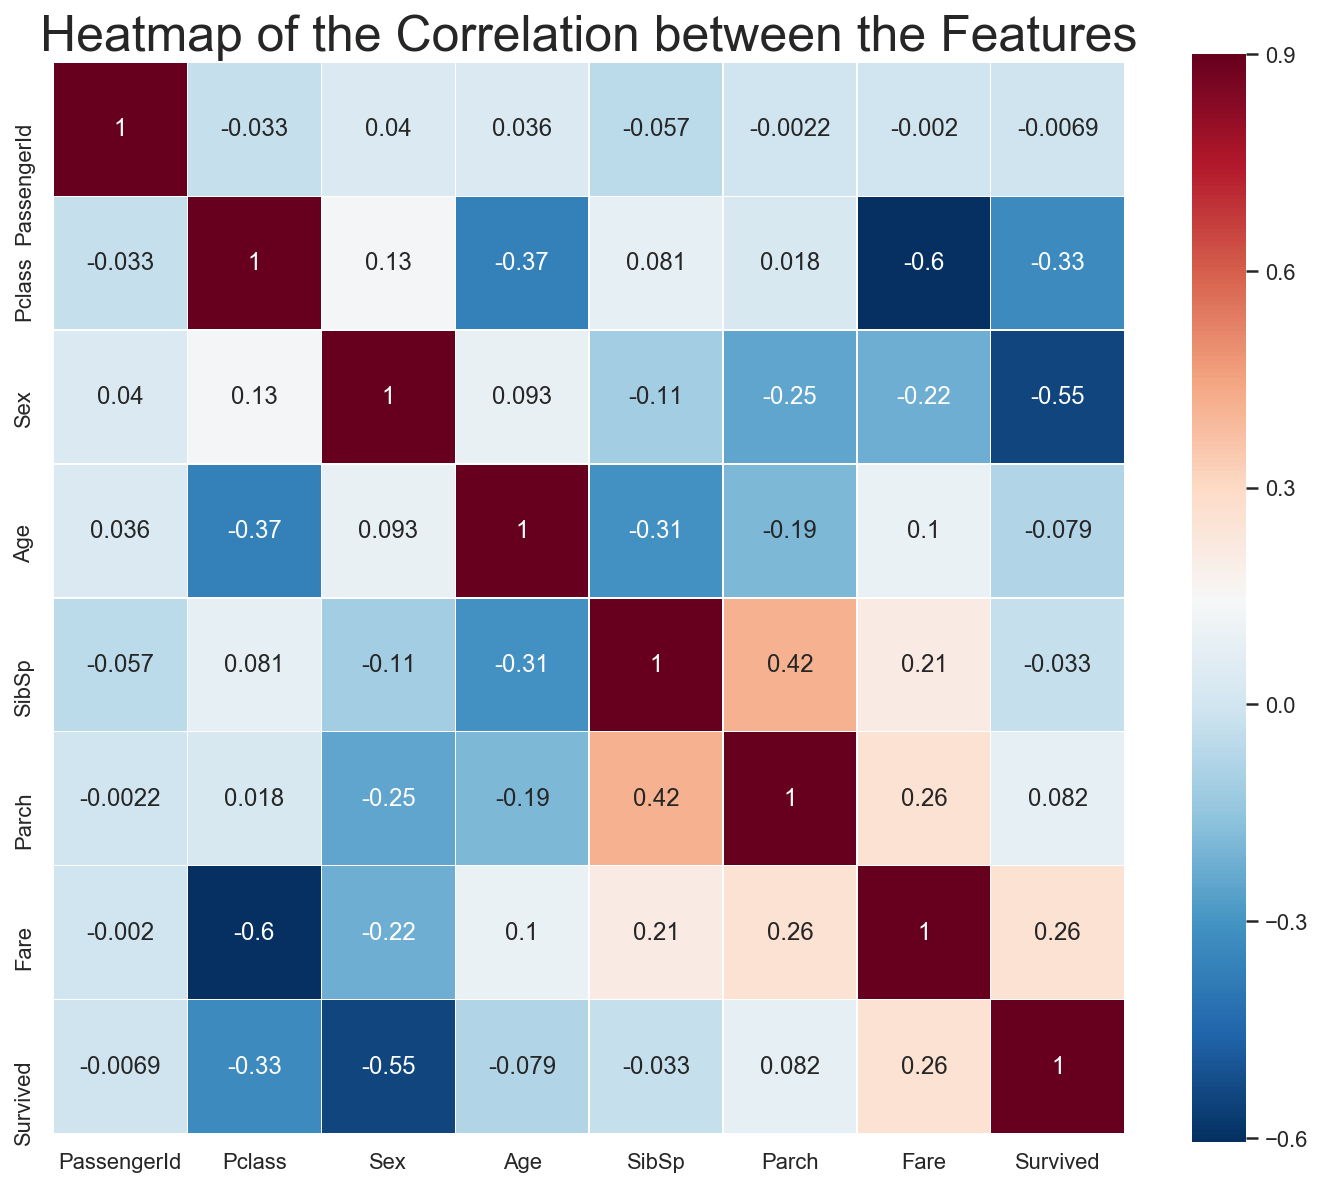

In [50]:
#mask = np.zeros_like(train.corr(), dtype=np.bool)

plt.subplots(figsize = (12,10)) #set size of the graph
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r', linewidths=0.1, linecolor='white', vmax = 0.9, square=True); #heatmap function

plt.title('Heatmap of the Correlation between the Features', fontsize=25);

#### Summary:
   1. **Notable Positively correlated features:** 
       - 'Fare' and 'Survived' **(0.26)** (Higher fare -> higher survival rate)
   
   2. **Notable Negatively correlated features:** 
       - 'Fare' and 'Pclass' **(-0.6)** (Less fare -> lower the class)
       - 'Sex' and 'Survived' **(-0.55)** (female -> higher chance of survival)
       - 'Pclass' and 'Survived' **(-0.33)**

### 4.1.2 Statistical Test for Correlation

#### Hypothesis Testing
   - **Question:** Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?
   
   - **Question:** Is there a substantial difference in survival rate between the male and female passengers?
   
   
   
   - $H_0$(Null hypothesis): There is no difference in the survival rate between the male and female passengers. Or the mean difference between male and female passenger in the survival rate is zero.
   - $H_1$(Alternate hypothesis): There is a difference in the survival rate between male and female passengers. Or the mean difference between male and female passenger in the survival rate is not zero.
   
   - **Test Statistics :** This is a two-sided test since the difference of the survival rate could be greater or less than zero. Standard deviation, $\sigma$, is the unknown parameter and $n$ is small, so we will use the t-distribution.
   - **Significance level:** We will use the standard significance level of $1-\alpha=0.95$ or $95\%$ confidence.


We will proceed and calculate the p-value

In [51]:
male_mean = train[train['Sex'] == 1].Survived.mean() #male survival rate mean

female_mean = train[train['Sex'] == 0].Survived.mean() #female survival rate mean

print('Male Survival Mean :'+str(male_mean))
print('Female Survival Mean:'+str(female_mean))

print('The mean difference between male and female survival rate:'+str(female_mean - male_mean))

Male Survival Mean :0.18608695652173912
Female Survival Mean:0.7412140575079872
The mean difference between male and female survival rate:0.5551271009862481


<font color=red>Note that this is not the population mean, but the sample mean!</font>

Now we will use the sampling distribution approach to do the test. We will take 50 samples

In [52]:
M = train[train['Sex'] == 1]
F = train[train['Sex'] == 0]

import random

MS = random.sample(list(M['Survived']), 50) #take 50 samples from male and female 
FS = random.sample(list(F['Survived']), 50)
                              
MSM = np.mean(MS) #take the mean of the 50 samples
FSM = np.mean(FS)
                              
print('Male Sample Mean :'+str(MSM))
print('Female Sample Mean :'+str(FSM))
print('Difference between male and female sample means :'+str(FSM - MSM))

Male Sample Mean :0.18
Female Sample Mean :0.78
Difference between male and female sample means :0.6000000000000001


We have randomly chosen 50 male and female passengers.

#### Now to answer the question: *How confident are we that, the measured difference is real or statistically significant?*

#### **Answer:** We can perform t-test to  evaluate the claim. t-test is used to evidence of the significant difference between population mean with the hypothesized mean or difference between the two population means (our case, 2 sample t-test).

The following is the t-statistic:

   ### $t=\frac{\bar x-\mu}{\frac{S}{\sqrt{n}}}........(1)$
   
   where 
   
   - $\bar x$ is the sample mean (test statistic)
   - $\mu$ is the hypothesized mean ($H_0$)
   - $S$ is the standard deviation
   - $n$ is the sample size
   
<font color=red>In order to calculate the two sample population mean, we will use the following equation:</font>
 
 ### $t=\frac{\bar x_M -\bar x_F}{\sqrt{S^2(\frac{1}{n_M}+\frac{1}{n_F})}}........(2)$
 
 where 
   
   - $\bar x_M$ is the sample mean for the male passengers
   - $\bar x_F$ is the sample mean for the female passengers
   - $S^2$ is the sample variance
   - $n_M$ and $n_F$ are the sample number of observations for male/female passengers
 
Equation (2) looks intimidating at first, but if we take a close look, we see that equation (1) and (2) are quiet similar. The only difference we see is that the hypothesis mean $H_0$ is replaced with another sample mean and one sample size is replaced by two sample sizes!

We will now make use of the *Scipy.stats* library to find the t-statistic.

In [53]:
import scipy.stats as stats

print(stats.ttest_ind(MS, FS))
print('This is the p-value when we break the value into a standard form:' + format(stats.ttest_ind(MS, FS).pvalue, '.32f'))

Ttest_indResult(statistic=-7.433919416750282, pvalue=4.008243182084006e-11)
This is the p-value when we break the value into a standard form:0.00000000004008243182084005975700


<font color=red>Now we compare p-value with $\alpha=0.05$. Since we know $p=4.008*10^{-11} < 0.05=\alpha$, we reject $H_0$, which means that our observatino is statistically significant. So we will reject our null hypothesis and the alternate hypothesis $H_1$ is valid. **"There is a significant difference in the survival rate between the male and female passengers."**

## 5 Feature Engineering

It is important to remembre that we will create new features in such ways that will not cause **multicollinearity** (when there is a relationship among independent variables) to occur.

### 5.1.1 Creating a new feature 'Name_length'

Creating a new feature 'Name_length' that will take the count of lettters of each name.

In [54]:
train['name_length'] = [len(i) for i in train.Name] #creating a new column using a for loop by counting each of the letters
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size): #define a function
    a = ''
    if (size <= 20):
        a = 'short'
    elif (size <= 35):
        a = 'medium'
    elif (size <= 45):
        a = 'good'
    else:
        a = 'long'
    return a

#A different approach to the function above:
#def name_length_group(size):
#   if (size <=20):
#      return 'short'
#   if (size <=35):
#      return 'medium'
#   if (size <=45):
#      return 'good'
#   return 'long

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

#'map' is python's built-in function.
#'map' function basically takes a function and returns an iterable list/tuple
#or in this case series. However, map can be used like map(function) i.e. map(
#name_length_group, train[feature]). However, here we do not need to use parameter(
#'size') for name_length_group because when we used the map function like '.map' with
#a series before dot, we are basically hnting that series and the iterable. This is 
#similar to .append approach in python.

In [55]:
#cuts the column by given bins based on the range of name_length
group_names = ['short','medium','good','long']
train['name_len_group'] = pd.cut(train['name_length'], bins =4, labels=group_names)

In [56]:
train.sample(5)

PassengerId  Pclass                                               Name  \
284          285       1                         Smith, Mr. Richard William   
399          400       2                   Trout, Mrs. William H (Jessie L)   
732          733       2                               Knight, Mr. Robert J   
731          732       3                           Hassan, Mr. Houssein G N   
700          701       1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   

     Sex   Age  SibSp  Parch    Ticket      Fare Cabin Embarked  Survived  \
284    1   NaN      0      0    113056   26.0000     A        S         0   
399    0  28.0      0      0    240929   12.6500     G        S         1   
732    1   NaN      0      0    239855    0.0000     G        S         0   
731    1  11.0      0      0      2699   18.7875     F        C         0   
700    0  18.0      1      0  PC 17757  227.5250     C        C         1   

     name_length nLength_group name_len_group  
284           26        medium          short  
399           32        medium         medium  
732           20         short          short  
731           24        medium          short  
700           49          long           good

### 5.1.2 Creating a 'Title' Feature

We will create a 'Title' feature which includes only the title from the names of the passengers

In [57]:
##'i.split' returns a list of strings after breaking the given brings 
##by the specified separator, in this case, either ',' or '.'.

train['title'] = [i.split('.')[0] for i in train.Name] 
train['title'] = [i.split(',')[1] for i in train.title] 
##split the title and the remaining name
##split the name into two by what follows after '.' and what comes before '.'
##Note[0] or [1] indicates what is on the leftside of ',' and 
##what is on the rightside of ',' accordingly.

test['title'] = [i.split('.')[0] for i in test.Name] #do the same for test
test['title'] = [i.split(',')[1] for i in test.title]

In [58]:
text = 'geeks for geeks'
print(text.split()) #splits that string by the separator, in this case ' '


['geeks', 'for', 'geeks']


In [59]:
word = 'geeks, for, geeks'
print(text.split(', '))

['geeks for geeks']


In [60]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]

#replace names in train data
train['title'] = [i.replace('Ms','Miss') for i in train.title]
train['title'] = [i.replace('Mile', 'Miss') for i in train.title]
train['title'] = [i.replace('Mme', 'Mrs') for i in train.title]
train['title'] = [i.replace('Dr', 'rare') for i in train.title]
train['title'] = [i.replace('Col', 'rare') for i in train.title]
train['title'] = [i.replace('Major', 'rare') for i in train.title]
train['title'] = [i.replace('Don', 'rare') for i in train.title]
train['title'] = [i.replace('Jonkheer', 'rare') for i in train.title]
train['title'] = [i.replace('Sir', 'rare') for i in train.title]
train['title'] = [i.replace('Lady', 'rare') for i in train.title]
train['title'] = [i.replace('Capt', 'rare') for i in train.title]
train['title'] = [i.replace('the Countess', 'rare') for i in train.title]
train['title'] = [i.replace('Rev', 'rare') for i in train.title]

#test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

### 5.1.2 Creating 'Family_size' feature

In [61]:
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [62]:
def family_group(size): #define a function
    a = ''
    if (size <=1):
        return 'loner'
    if (size <=4):
        return 'small'
    return 'large'

In [63]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

### 5.1.3 Creating 'is_alone' feature

In [64]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

### 5.1.4 Getting rid of the 'Ticket' feature

In [65]:
train.Ticket.value_counts().sample(5)

SC/AH 3085     1
330931         1
345777         1
370372         1
W.E.P. 5734    1
Name: Ticket, dtype: int64

In [66]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

### 5.1.5 Creating 'calculated_fare' feature

In [67]:
##Calculate fare based on family size
train['calculated_fare'] = train.Fare/train.family_size #quotient of fare per family size
test['calculated_fare'] = test.Fare/test.family_size

<font color=red>Some people travellved in groups, so we calculate the fare by the number of people they traveled with.</font>

### 5.1.6 Creating a 'fare_group' feature

This is extended from 5.1.5 above

In [68]:
def fare_group(fare) :
    a = ''
    if fare <=4:
        return 'Very_low'
    if fare <=10:
        return 'low'
    if fare <=20:
        return 'mid'
    if fare <=45:
        return 'high'
    return 'very_high'

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

### 5.1.7 Dropping 'PassengerId' feature

In [69]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

### 5.1.8 Creating dummy variables

Dummy variable is an important processing machine learning process. Usually categorical variables are important features, which can be the difference between a good model and a bad model. When working with the dataset, having meaningful value such as 'male' or 'female' instead of 0's or 1's is more intuitive for us. But, machines do not understand categorical values, for example, in this dataset, we have gender male or female, and algorithms do not accept categorical variables as input. Hence we do the following:

In [70]:
train = pd.get_dummies(train, columns=['title','Pclass','Cabin','Embarked', 'nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title','Pclass','Cabin','Embarked', 'nLength_group', 'family_group', 'fare_group'], drop_first=False)

train.drop(['family_size','Name','Fare','name_length'], axis=1, inplace=True)
test.drop(['family_size','Name','Fare','name_length'], axis=1, inplace=True)

In [83]:
#pandas.get_dummies(data, columns=None, drop_first=False)
#convert categorical variable into dummy/indicator variables
#columns: column names in the DataFrame to be included
#drop_first: whether to get k-1 dummies out of k categorical levels by 
#removing the first level.
#in ourcase, we got k dummies in our case.

### 5.1.9 Age feature

We will use the *random forest regressor* in to predict the missing age values. We will proceed and check how many missing values we have

In [71]:
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
#train.loc[:, "is_alone":] means all rows and everything including 'is_alone' onwards on the columns
#axis: the axis to concatenate along (default=0)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)
#combine 'Age' and 'Sex' with all the columns including 'SibSp' and onwards and all the rows!
#essentially got rid of the 'Survived' feature.

<font color=red>A little note about axis in Pandas. Axis specifies the axis along which the operation is performed. Axis=0 means operation is performed from the top to the bottom. Axis=1 means operation is performed from the left to the right.</font>

In [72]:
train.head()

Survived   Age  Sex  SibSp  Parch  is_alone  calculated_fare  \
0         0  22.0    1      1      0         0          3.62500   
1         1  38.0    0      1      0         0         35.64165   
2         1  26.0    0      0      0         1          7.92500   
3         1  35.0    0      1      0         0         26.55000   
4         0  35.0    1      0      0         1          8.05000   

   title_ Master  title_ Miss  title_ Mlle          ...           \
0              0            0            0          ...            
1              0            0            0          ...            
2              0            1            0          ...            
3              0            0            0          ...            
4              0            0            0          ...            

   nLength_group_medium  nLength_group_short  family_group_large  \
0                     1                    0                   0   
1                     0                    0                   0   
2                     1                    0                   0   
3                     0                    0                   0   
4                     1                    0                   0   

   family_group_loner  family_group_small  fare_group_Very_low  \
0                   0                   1                    1   
1                   0                   1                    0   
2                   1                   0                    0   
3                   0                   1                    0   
4                   1                   0                    0   

   fare_group_high  fare_group_low  fare_group_mid  fare_group_very_high  
0                0               0               0                     0  
1                1               0               0                     0  
2                0               1               0                     0  
3                1               0               0                     0  
4                0               1               0                     0  

[5 rows x 39 columns]

In [73]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

##Define a function that fills missing values in a Dataframe
def completing_age(df):
    #Get all the features except survived
    age_df = df.loc[:, 'Age':] #all the columns after 'Age' inclusive in the specified dataframe
    #'Age': means everything 'Age' and onwards
    # [:, 'Age':] means everything on the row and everything after 'Age' including itself on the column
    #DataFrame.loc['col_name'] accesses a group or rows and columns by labels or a boolean array
    #DataFrame.loc['col_name'] same as DataFrame.col_name
    
    temp_train = age_df.loc[age_df.Age.notnull()] #df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] #df w/o age values
    
    y = temp_train.Age.values ##setting target variables (age) in y
    x = temp_train.loc[:, 'Sex':].values #all rows and everything after 'Sex' inclusive in the columns
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    #n_estimators: integer, optional (default=10) or number of estimators
    #n_jobs: int or None, optional (default=None) or the # of jobs to run in parallel for both
    #fit and predict. None means 1 and -1 means using all precessors.
    rfr.fit(x,y)
    #.fit(x,y): build a forest of trees from the training set (x,y)

    predicted_age = rfr.predict(temp_test.loc[:, 'Sex':])
    #.predict(x): predict regression target for x
    
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df

#Now we proceed and implement the completing_age function in both train and test dataset
completing_age(train)
completing_age(test);

Age  Sex  SibSp  Parch  is_alone  calculated_fare  title_ Master  \
891   34.500000    1      0      0         1         7.829200              0   
892   47.000000    0      1      0         0         3.500000              0   
893   62.000000    1      0      0         1         9.687500              0   
894   27.000000    1      0      0         1         8.662500              0   
895   22.000000    0      1      1         0         4.095833              0   
896   14.000000    1      0      0         1         9.225000              0   
897   30.000000    0      0      0         1         7.629200              0   
898   26.000000    1      1      1         0         9.666667              0   
899   18.000000    0      0      0         1         7.229200              0   
900   21.000000    1      2      0         0         8.050000              0   
901   25.128833    1      0      0         1         7.895800              0   
902   46.000000    1      0      0         1        26.000000              0   
903   23.000000    0      1      0         0        41.133350              0   
904   63.000000    1      1      0         0        13.000000              0   
905   47.000000    0      1      0         0        30.587500              0   
906   24.000000    0      1      0         0        13.860400              0   
907   35.000000    1      0      0         1        12.350000              0   
908   21.000000    1      0      0         1         7.225000              0   
909   27.000000    0      1      0         0         3.962500              0   
910   45.000000    0      0      0         1         7.225000              0   
911   55.000000    1      1      0         0        29.700000              0   
912    9.000000    1      0      1         0         1.585400              1   
913   44.481067    0      0      0         1        31.683300              0   
914   21.000000    1      0      1         0        30.689600              0   
915   48.000000    0      1      3         0        52.475000              0   
916   50.000000    1      1      0         0         7.250000              0   
917   22.000000    0      0      1         0        30.989600              0   
918   22.500000    1      0      0         1         7.225000              0   
919   41.000000    1      0      0         1        30.500000              0   
920   23.586323    1      2      0         0         7.226400              0   
...         ...  ...    ...    ...       ...              ...            ...   
1279  21.000000    1      0      0         1         7.750000              0   
1280   6.000000    1      3      1         0         4.215000              1   
1281  23.000000    1      0      0         1        93.500000              0   
1282  51.000000    0      0      1         0        19.700000              0   
1283  13.000000    1      0      2         0         6.750000              1   
1284  47.000000    1      0      0         1        10.500000              0   
1285  29.000000    1      3      1         0         4.405000              0   
1286  18.000000    0      1      0         0        30.000000              0   
1287  24.000000    1      0      0         1         7.250000              0   
1288  48.000000    0      1      1         0        26.400000              0   
1289  22.000000    1      0      0         1         7.775000              0   
1290  31.000000    1      0      0         1         7.733300              0   
1291  30.000000    0      0      0         1       164.866700              0   
1292  38.000000    1      1      0         0        10.500000              0   
1293  22.000000    0      0      1         0        29.700000              0   
1294  17.000000    1      0      0         1        47.100000              0   
1295  43.000000    1      1      0         0        13.860400              0   
1296  20.000000    1      0      0         1        13.862500              0   
1297  23.000

We proceed and plot a histogram

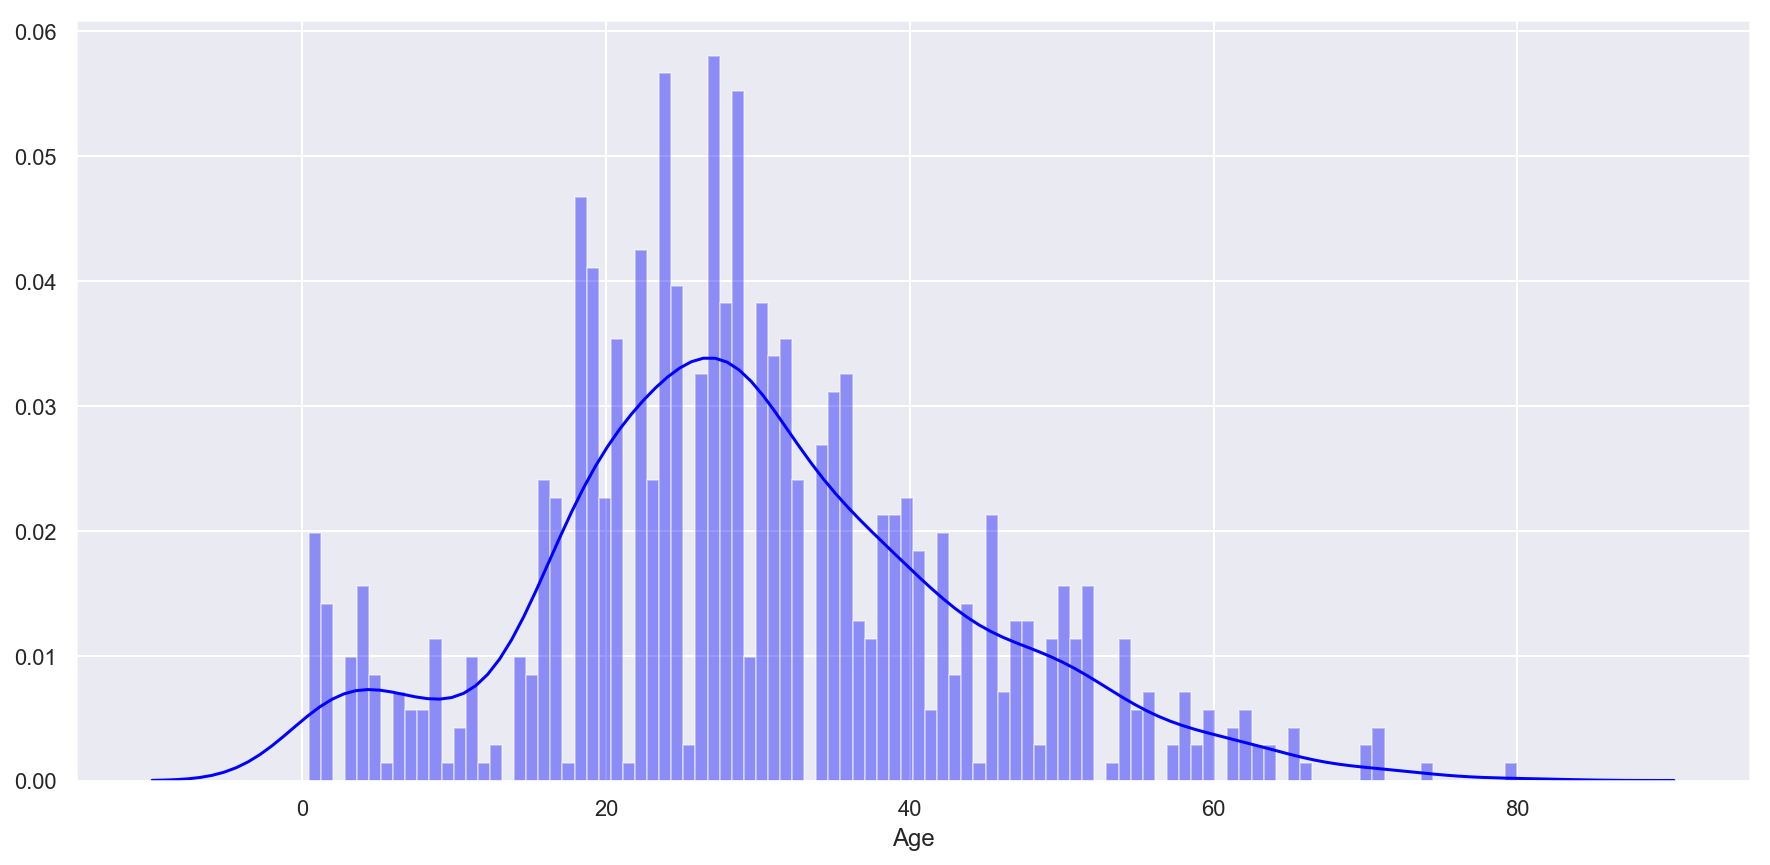

In [81]:
plt.subplots(figsize=(15,7),)
sns.distplot(train.Age, bins=100, kde=True, rug=False, norm_hist=False, color='blue');
#seaborn.distplot: Flexibly plots a univariate distribution of observations
#bins: argument for matplotlib hist()
#norm_hist: whether to plot a normed histogram (bool)
#kde: whether to plot a gaussian kernel density estimate (bool)
#rug: whether to draw a rugplot on the support axis (bool)


We see that majority of the population were from 25 - 30.

### 5.1.10 'Age Group' Feature

In [85]:
#define the 'age_group_fun' function
def age_group_fun(age):
    a = ''
    if age <= 1:
        return 'infant'
    if age <= 4:
        return 'toddler'
    if age <= 13:
        return 'child'
    if age <= 18:
        return 'teenager'
    if age <= 35:
        return 'Young_Adult'
    if age <= 45:
        return 'adult'
    if age <= 55:
        return 'middle_aged'
    if age <= 65:
        return 'senior_citizen'
    return 'old'

#Apply 'age_group_fun' function to the 'Age' feature.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

#create dummies for 'age_group' feature
train = pd.get_dummies(train, columns=['age_group'], drop_first=True)
test = pd.get_dummies(test, columns=['age_group'], drop_first=True)

'''train.drop('Age', axis=1, inplace=True)
test.drop('Age',axis=1, inplace=True)'''

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age',axis=1, inplace=True)"

#### pd.get_dummies() examples:

In [89]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [90]:
pd.get_dummies(s)

a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  1  0  0

In [91]:
s1 = ['a', 'b', np.nan]
s1

['a', 'b', nan]

In [92]:
pd.get_dummies(s1)

a  b
0  1  0
1  0  1
2  0  0

## 6.1 Pre-Modeling Tasks
***
### 6.1.1 Separating dependent and independent variables

Before we go ahead and apply ML models, it is important to separate dependent and independent variables. Our dependent variable (*target variable*) *is something that we are trying to find*, and our independent variable is *the features we use to find the dependent variable*. **The way we use ML algorithm in a dataset is that we train our ML model by specifying independent variables and dependent variables.** To specify them, we need to separate them from each other, and the code below does that.

>Note that in our test dataset, we do not have a dependent variable feature. We are to predict that using ML models.

In [ ]:
#separate indep. and dep. variables
x = train.drop(['Survived'], axis =1) #set variable for train w/0 'Survived' feature
y = train['Survived'] #set variable for train w/ 'Survived' feature

age_filled_data_nor = NuclearNormMinimization().complete(df1)
Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
pd.DataFrame(zip(data['Age'], Data_1['Age'], df['Age']))

#### Nuclear norm approximation